# Collaborative Filter
We will now take our test data and build a **collaborative filter** using **FastAI** framework

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import os

from fastai.tabular import *
from fastai.collab import *

%matplotlib inline

In [5]:
df = pd.read_csv('./wine_data/wine_data.csv')
df.drop(columns=['Unnamed: 0'],inplace=True) # removing unecessary column

In [6]:
df.head(3)

,taster_name,title,norm_points
0,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),1.75
1,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),1.75
2,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),1.75


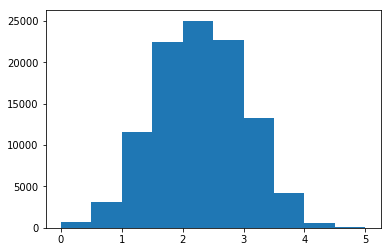

In [11]:
plt.hist(df['norm_points'])
plt.show()

In [12]:
y_range = [0,5.5]

In [16]:
data = CollabDataBunch.from_df(df, pct_val=.1, seed=42, item_name='title')

In [17]:
data.show_batch(3)

taster_name,title,target
Michael Schachner,Domaine Le Billoud 2011 Barrica 29 Cabernet Sauvignon (Mendoza),1.25
Roger Voss,Château Bellegrave du Poujeau 2007 Haut-Médoc,1.25
Kerin O’Keefe,Franci 2010 Riserva (Brunello di Montalcino),2.25


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


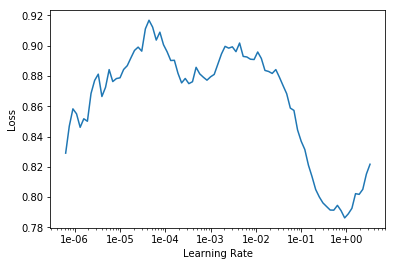

In [19]:
"""
Test 1 - default
"""
learn = collab_learner(data, n_factors=40, y_range=y_range, metrics=[mean_squared_error])

learn.lr_find()
learn.recorder.plot()

In [20]:
lr = 1e-1

In [21]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,mean_squared_error
1,0.654842,0.674675,0.674675
2,0.790662,0.931833,0.931833
3,0.511612,0.627830,0.627830
4,0.305180,0.486454,0.486454
5,0.157949,0.461301,0.461301


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


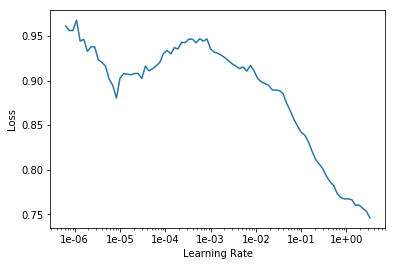

In [29]:
"""
Model A
"""
learn = collab_learner(data, n_factors=40, y_range=y_range, metrics=[mean_squared_error], wd=1e-1)

learn.lr_find()
learn.recorder.plot()

In [30]:
learn.save('A')

In [31]:
lr = 2e-1
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,mean_squared_error
1,0.590088,0.626705,0.626705
2,0.602380,0.629388,0.629388
3,0.606474,0.619871,0.619871
4,0.497636,0.507841,0.507841
5,0.411839,0.472903,0.472903


In [33]:
# training for longer
learn.load('A')
learn.fit_one_cycle(10, slice(lr))

epoch,train_loss,valid_loss,mean_squared_error
1,0.513015,0.525072,0.525072
2,0.610519,0.626714,0.626714
3,0.625084,0.654526,0.654526
4,0.620177,0.628847,0.628847
5,0.668746,0.695763,0.695763
6,0.603762,0.608253,0.608253
7,0.562170,0.549724,0.549723
8,0.520090,0.508388,0.508388
9,0.457663,0.473576,0.473576
10,0.229452,0.462699,0.462699


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


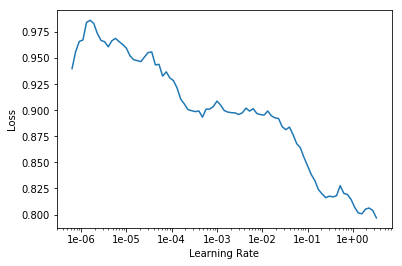

In [34]:
"""
Model B
"""
learn = collab_learner(data, n_factors=40, y_range=y_range, metrics=[mean_squared_error], wd=1e-2)

learn.lr_find()
learn.recorder.plot()

In [35]:
learn.save('B')

In [36]:
lr = 7e-2
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,mean_squared_error
1,0.558307,0.569437,0.569437
2,0.555455,0.711479,0.711479
3,0.392435,0.531534,0.531534
4,0.232601,0.475391,0.475391
5,0.113486,0.456322,0.456322


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


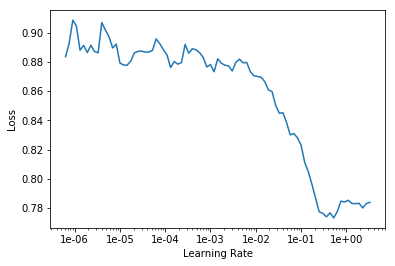

In [37]:
"""
Model C
"""
learn = collab_learner(data, n_factors=40, y_range=y_range, metrics=[mean_squared_error], wd=1e-3)

learn.lr_find()
learn.recorder.plot()

In [38]:
learn.save('C')

In [43]:
learn.load('C')
lr = 5e-2
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,mean_squared_error
1,0.497638,0.511142,0.511142
2,0.422888,0.596022,0.596022
3,0.368036,0.524254,0.524254
4,0.191124,0.478487,0.478487
5,0.096677,0.470042,0.470042


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


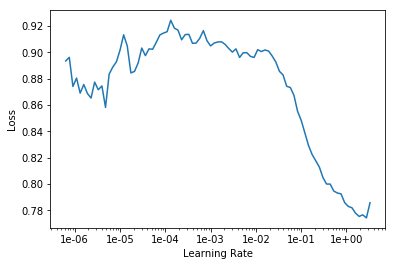

In [44]:
"""
Model D
"""
learn = collab_learner(data, n_factors=40, y_range=y_range, metrics=[mean_squared_error], wd=1e-4)

learn.lr_find()
learn.recorder.plot()

In [45]:
learn.save('D')

In [47]:
learn.load('D')
lr = 1e-2
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,mean_squared_error
1,0.477706,0.477209,0.477209
2,0.315498,0.485093,0.485093
3,0.166873,0.455911,0.455911
4,0.055193,0.449504,0.449504
5,0.026954,0.447880,0.447880


# Conclusion
Given that our test was successful, we will next use a larger dataset and fine-tune our model. 

If we cannot find a larger database, we will fine-tune this model & setup and endpoint for our webapp.